In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data

In [2]:
df = pd.read_excel('Dataset/shopping_dataset.xlsx', nrows=52924, sheet_name='in')
df = df.iloc[:,1:] # get rid of the first column (row number)

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
df.tail()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
52919,13155,F,California,8,22504,2019-03-10,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1,250.00,0.0,Clicked,0.05,2019-03-10,2500,1294.22,3,GC30,30.0
52920,18077,M,Chicago,34,24250,2019-03-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,25.00,0.0,Used,0.05,2019-03-28,2000,1066.12,3,GC30,30.0
52921,16085,M,California,15,39991,2019-10-06,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1,10.80,6.0,Clicked,0.05,2019-10-06,3000,2230.76,10,NJ10,10.0
52922,16085,M,California,15,39991,2019-10-06,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,1,9.60,6.0,Used,0.05,2019-10-06,3000,2230.76,10,NJ10,10.0
52923,13659,F,Chicago,8,39998,2019-10-06,GGOEGOCC077999,Google Spiral Journal with Pen,Notebooks & Journals,1,5.59,6.5,Not Used,0.05,2019-10-06,3000,2230.76,10,NJ10,10.0


# Get the reference file for the product category

In [3]:
df_ref = pd.read_csv('Reference/prod_categories.csv')
df_ref.head()

,Product_Description,Product_Category,Predicted_Category
0,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,home & kitchen
1,Nest Cam Outdoor Security Camera - USA,Nest-USA,home & kitchen
2,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,home & kitchen
3,Nest Cam Indoor Security Camera - USA,Nest-USA,home & kitchen
4,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,home & kitchen


# Joining the predicted_category to the shopping dataset

In [4]:
df = pd.merge(df, df_ref
         ,how='left'
         ,left_on='Product_Description'
         ,right_on='Product_Description')

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category_x,Quantity,...,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Product_Category_y,Predicted_Category
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,Nest-USA,home & kitchen
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,Nest-USA,home & kitchen
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,Not Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,Nest-USA,home & kitchen
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,Nest-USA,home & kitchen
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,Nest-USA,home & kitchen


# EDA

### What is the distribution of the number of purchases per customer?

<Axes: ylabel='Frequency'>

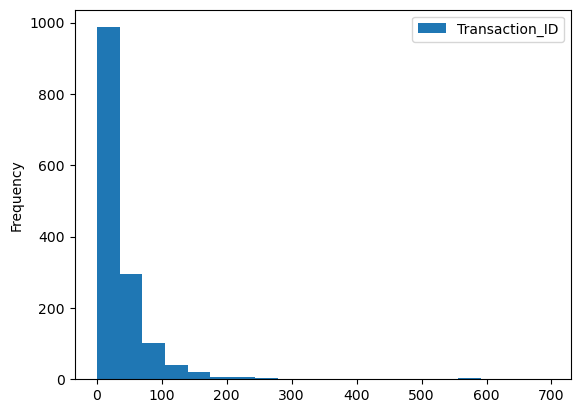

In [5]:
eda_1 = (df[['CustomerID', 'Transaction_ID']]
        .groupby('CustomerID')
        .count()
        .sort_values(by="Transaction_ID", ascending=False)
        .reset_index())
eda_1[['Transaction_ID']].plot(kind='hist', bins=20)

### Which product categories have the most purchases? Mean price per product category?

In [6]:
agg_funcs = {
    'mean': 'mean',
    'std': 'std',
    'median': 'median'
}

# Group by the 'group' column and apply the aggregation functions
eda_2 = (df[['Predicted_Category', 'Avg_Price']]
         .groupby('Predicted_Category')
         .agg([ 'mean', 'std', 'median', 'count']))

eda_2

Avg_Price                          
                           mean        std  median  count
Predicted_Category                                       
Caps and Hats         12.846819   4.370508   10.99   1484
Drinkware             10.348885   7.587827   10.39   3856
Gift Cards           111.363270  92.715308  100.00    159
Hoodies and Jackets   45.908604  15.471531   44.79   2163
Kids Apparel          17.206015   7.916727   15.19   1473
Tees                  12.711755   9.829002   13.29  14325
bags & luggage        58.474828  76.120316   19.99   1717
beauty & health      113.347428  69.303518   99.00   1843
car & motorbike        5.033951   3.507771    5.59    367
home & kitchen       131.311939  50.045914  119.00  15007
office                 4.248754   4.138899    2.99   7329
onesie                19.936873   2.193803   19.19    355
pet supplies           2.948028   1.448291    2.79    497
sports & fitness      25.448957  21.326513   17.59   2349

### Which customers are big spenders?

In [7]:
eda_3 = (df[['CustomerID', 'Avg_Price']]
        .groupby('CustomerID')
        .sum()
        .sort_values(by="Avg_Price", ascending=False)
        .reset_index())
eda_3.head(20)

,CustomerID,Avg_Price
0,12748,31285.63
1,14911,29721.53
2,14606,29676.79
3,15311,29633.75
4,17841,27616.21
5,17850,20483.98
6,13089,19074.62
7,17337,18941.70
8,14646,15579.78
9,12539,13755.71


### Distribution of Men/Women per product category